In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from numpy.linalg import cholesky, eig

from scipy.stats import norm, chi2, multivariate_normal

%matplotlib inline

# A. 1D Normal Distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

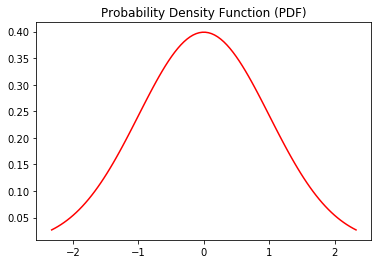

In [2]:
plt.figure()
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x), 'r-')
plt.title('Probability Density Function (PDF)')
plt.show()

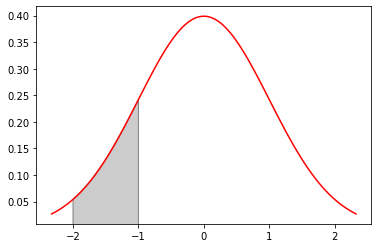

In [3]:
fig, ax = plt.subplots()

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x), 'r-')

a = -2.0
b = -1.0
x_ = np.linspace(a, b, 100)
y_ = norm.pdf(x_)
ax.add_patch(Polygon([(a, 0), *zip(x_, y_), (b, 0)], edgecolor='0.50', facecolor='0.80'))

plt.show()

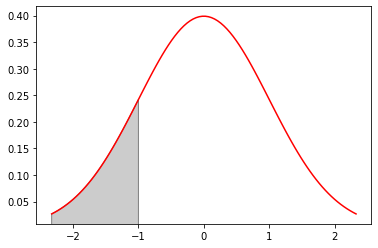

In [4]:
fig, ax = plt.subplots()

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x), 'r-')

a = x[0]
b = -1.0
x_ = np.linspace(a, b, 100)
y_ = norm.pdf(x_)
ax.add_patch(Polygon([(a, 0), *zip(x_, y_), (b, 0)], edgecolor='0.50', facecolor='0.80'))

plt.show()

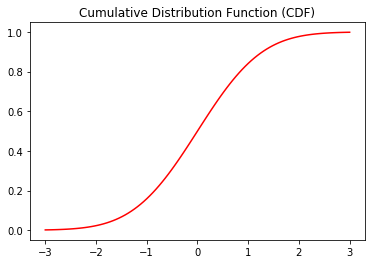

In [5]:
plt.figure()
x = np.linspace(-3.0, 3.0, 100)
plt.plot(x, norm.cdf(x), 'r-')
plt.title('Cumulative Distribution Function (CDF)')
plt.show()

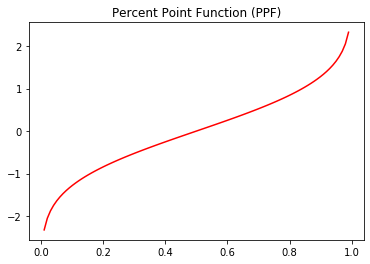

In [6]:
plt.figure()
x = np.linspace(0.0, 1.0, 100)
plt.plot(x, norm.ppf(x), 'r-')
plt.title('Percent Point Function (PPF)')
plt.show()

In [7]:
data = np.random.randn(100000)

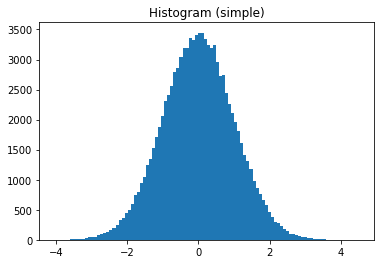

In [8]:
plt.figure()
plt.hist(data, bins=100)
plt.title('Histogram (simple)')
plt.show()

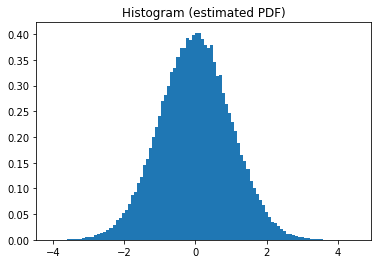

In [9]:
plt.figure()
plt.hist(data, bins=100, density=True)
# plt.hist(data, bins=100, density=True, histtype='step')
plt.title('Histogram (estimated PDF)')
plt.show()

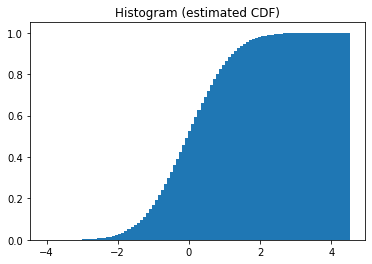

In [10]:
plt.figure()
plt.hist(data, bins=100, cumulative=True, density=True)
# plt.hist(data, bins=100, cumulative=True, density=True, histtype='step')
plt.title('Histogram (estimated CDF)')
plt.show()

In [11]:
# Jakie jest prawdopodobieństwo, że otrzymana wartość będzie mniejsza od -1.0?

a = -1.0

# na podstawie rozkładu prawdopodobieństwa
# (zakładamy, że jesteśmy pewni, że wartości pochodzą z rozkładu normalnego)
p1 = norm.cdf(a)
print(p1)

# na postawie próbki danych z rozkładu prawdopodobieństwa
# (nie jesteśmy pewni jaki to rozkład prawdopodobieństwa, ale mamy próbkę danych otrzymanych z niego)
p2 = len(data[data < a]) / len(data)
print(p2)

0.15865525393145707
0.15717


In [12]:
# Od jakiej wartości będzie mniejsza otrzymana wartość z prawdopodobieństwem 0.15 ? (niejasno napisane?)

p = 0.15

# na podstawie rozkładu prawdopodobieństwa
# (zakładamy, że jesteśmy pewni, że wartości pochodzą z rozkładu normalnego)
a1 = norm.ppf(p)
print(a1)

# na postawie próbki danych z rozkładu prawdopodobieństwa
# (nie jesteśmy pewni jaki to rozkład prawdopodobieństwa, ale mamy próbkę danych otrzymanych z niego)
a2 = np.sort(data)[int(p * len(data))]
print(a2)

-1.0364333894937898
-1.0300716703704307


## A.1. Fakt:

Jeśli zmienna losowa $X$ ma rozkład normalny $\mathcal{N}(\mu, \sigma^2)$, to zmienna losowa $aX + b$ ma rozkład normalny $\mathcal{N}(a \mu + b, a^2 \sigma^2)$, dla dowolnych liczb $a$ i $b$.

# B. 2D Normal Distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

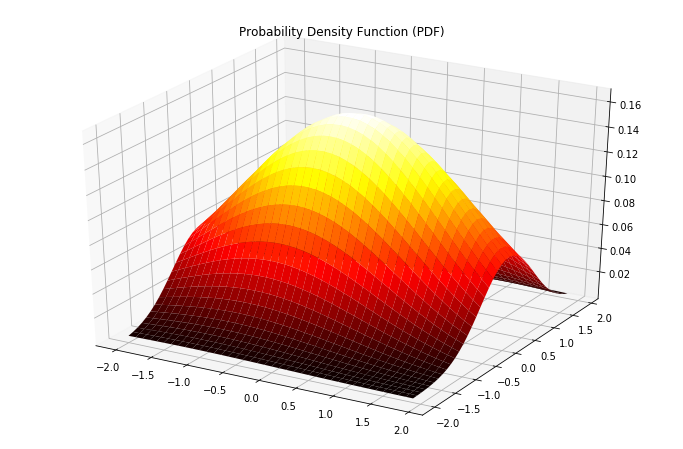

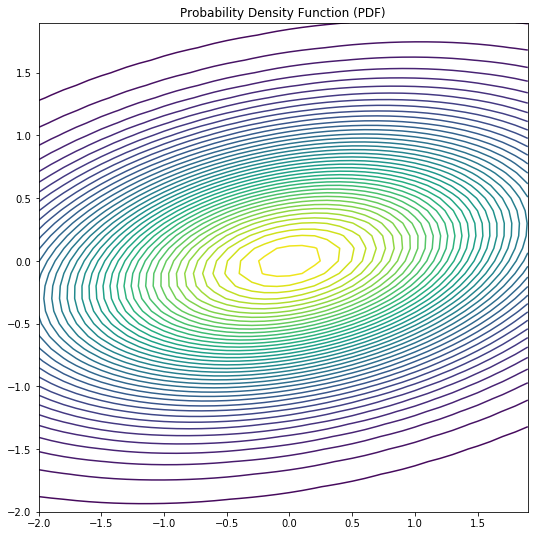

In [13]:
# rv = multivariate_normal([0.0, 0.0], [[1.0, 0.0], [0.0, 1.0]])
# rv = multivariate_normal([0.0, 0.0], [[1.0, 0.0], [0.0, 4.0]])
rv = multivariate_normal([0.0, 0.0], [[2.0, 0.3], [0.3, 0.5]])

domain_X = np.arange(-2.0, 2.0, 0.10)
domain_Y = np.arange(-2.0, 2.0, 0.10)

plt.figure(figsize=(12, 8))
ax = plt.gca(projection='3d')
X, Y = np.meshgrid(domain_X, domain_Y)
Z = rv.pdf(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
plt.title('Probability Density Function (PDF)')
plt.show()

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
X, Y = np.meshgrid(domain_X, domain_Y)
Z = rv.pdf(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
plt.contour(X, Y, Z, 50)
plt.title('Probability Density Function (PDF)')
plt.show()

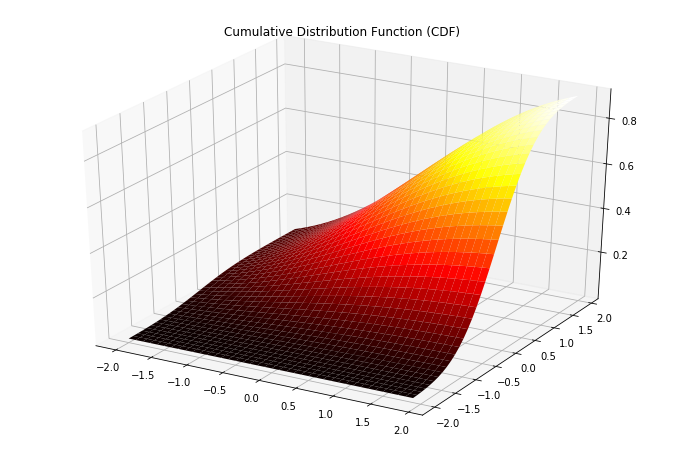

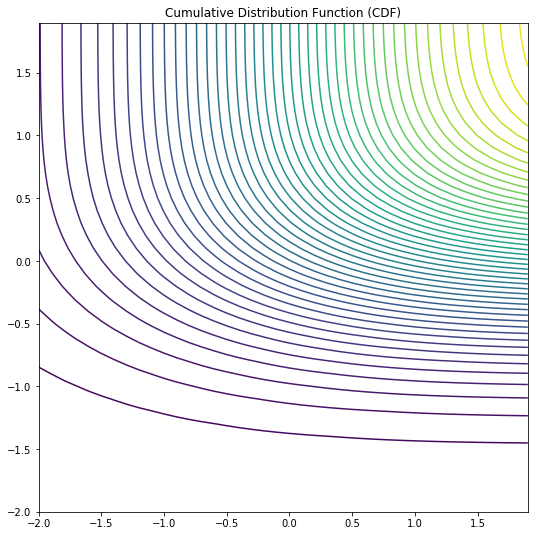

In [14]:
domain_X = np.arange(-2.0, 2.0, 0.10)
domain_Y = np.arange(-2.0, 2.0, 0.10)

# domain_X = np.arange(-4.0, 4.0, 0.10)
# domain_Y = np.arange(-4.0, 4.0, 0.10)

plt.figure(figsize=(12, 8))
ax = plt.gca(projection='3d')
X, Y = np.meshgrid(domain_X, domain_Y)
Z = rv.cdf(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
plt.title('Cumulative Distribution Function (CDF)')
plt.show()

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
X, Y = np.meshgrid(domain_X, domain_Y)
Z = rv.cdf(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
plt.contour(X, Y, Z, 50)
plt.title('Cumulative Distribution Function (CDF)')
plt.show()

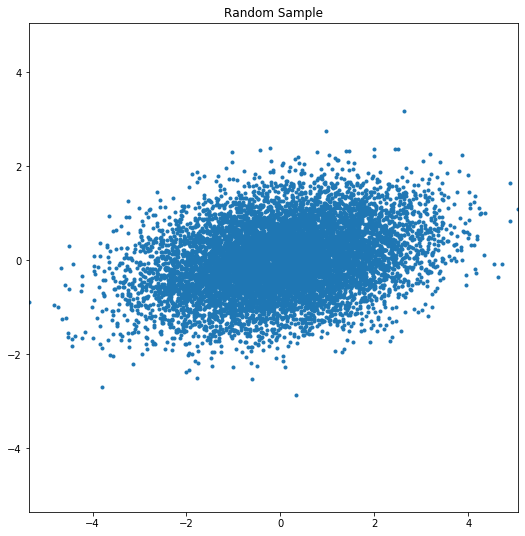

In [15]:
data = rv.rvs(size=10000).T

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.plot(data[0, :], data[1, :], '.')
plt.title('Random Sample')
plt.xlim([data.min(), data.max()])
plt.ylim([data.min(), data.max()])
plt.show()

## B.1. Fakt:

Jeśli wektor losowy $X$ ma rozkład normalny $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, to wektor losowy $\mathbf{A}X + \mathbf{b}$ ma rozkład normalny $\mathcal{N}(\mathbf{A}\mathbf{\mu} + \mathbf{b}, \mathbf{A}\mathbf{\Sigma}\mathbf{A}^T)$, dla dowolnej macierzy $\mathbf{A}$ i dowolnego wektora $\mathbf{b}$ (odpowiednich rozmiarów).

## B.2. Rozkład Cholesky'ego macierzy symetrycznej dodatniookreślonej

Rozkład Cholesky'ego pozwala nam przedstawić macierz kowariancji $\mathbf{\Sigma}$ jako $\mathbf{A}\mathbf{A}^T$.
Jeśli wektor losowy $X$ ma rozkład normalny $\mathcal{N}(\mathbf{0}, \mathbf{I})$, to wektor losowy $Z = A \cdot X$ ma rozkład normalny $\mathcal{N}(\mathbf{0}, \mathbf{A}\mathbf{I}\mathbf{A}^T)$, czyli $\mathcal{N}(\mathbf{0}, \mathbf{A}\mathbf{A}^T)$, czyli $\mathcal{N}(\mathbf{0}, \mathbf{\Sigma})$.

In [16]:
S = np.array([[2.0, 0.3], [0.3, 0.5]])
S

array([[2. , 0.3],
       [0.3, 0.5]])

In [17]:
A = cholesky(S)
A

array([[1.41421356, 0.        ],
       [0.21213203, 0.67453688]])

In [18]:
A.dot(A.T)

array([[2. , 0.3],
       [0.3, 0.5]])

In [19]:
X = np.random.randn(2, 100000)

In [20]:
np.cov(X)

array([[1.00487038, 0.0025357 ],
       [0.0025357 , 1.00464045]])

In [21]:
Z = A.dot(X)

In [22]:
np.cov(Z)

array([[2.00974075, 0.30388001],
       [0.30388001, 0.50305624]])

## B.3. Odległość losowego punktu od środka układu współrzędnych

Jeśli zmienne losowe $X_1$ i $X_2$ mają rozkład normalny $\mathcal{N}(0, 1)$, to zmienna losowa $Z = X_1^2 + X_2^2$ ma rozkład $\chi^2$ z dwoma stopniami swobody.

Jeśli więc losujemy punkt $(x_1, x_2)$ z rozkładem normalnym dwuwymiarowym $\mathcal{N}(\mathbf{0}, \mathbf{I})$ (czyli współrzędną $x_1$ losujemy z jednowymiarowym rozkładem normalnym $\mathcal{N}(0, 1)$ oraz współrzędną $x_2$ losujemy z jednowymiarowym rozkładem normalnym $\mathcal{N}(0, 1)$), to kwadrat odległości punktu $(x_1, x_2)$ od początku układu współrzędnych $z = x_1^2 + x_2^2$ ma rozkład $\chi^2$ z dwoma stopniami swobody.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

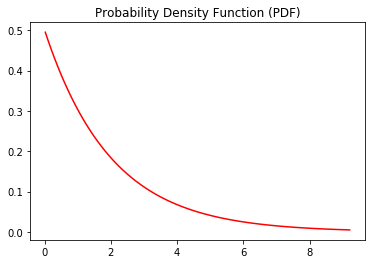

In [23]:
plt.figure()
x = np.linspace(chi2.ppf(0.01, 2), chi2.ppf(0.99, 2), 100)
plt.plot(x, chi2.pdf(x, 2), 'r-')
plt.title('Probability Density Function (PDF)')
plt.show()

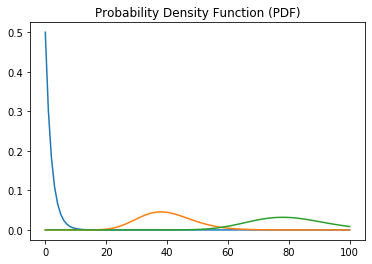

In [24]:
plt.figure()
# x = np.linspace(chi2.ppf(0.01, 2), chi2.ppf(0.99, 2), 100)
x = np.linspace(0, 100, 100)
plt.plot(x, chi2.pdf(x, 2), '-')
plt.plot(x, chi2.pdf(x, 40), '-')
plt.plot(x, chi2.pdf(x, 80), '-')
plt.title('Probability Density Function (PDF)')
plt.show()

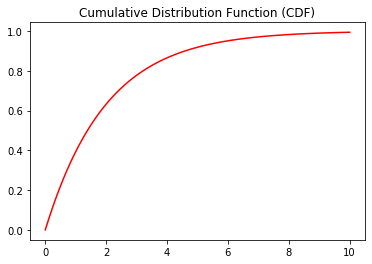

In [25]:
plt.figure()
x = np.linspace(0.0, 10.0, 100)
plt.plot(x, chi2.cdf(x, 2), 'r-')
plt.title('Cumulative Distribution Function (CDF)')
plt.show()

In [26]:
data = np.random.randn(2, 10000)

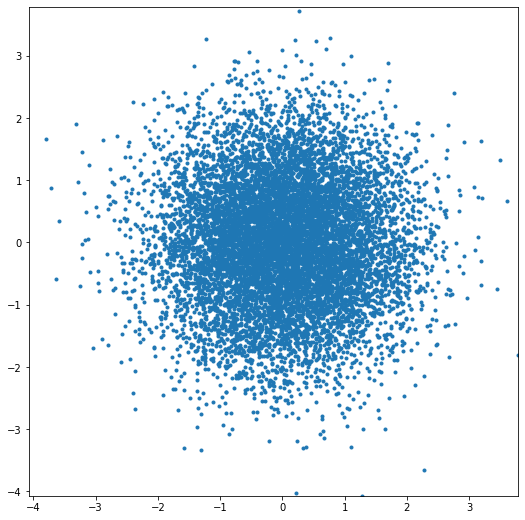

In [27]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.plot(data[0, :], data[1, :], '.')
plt.xlim([data.min(), data.max()])
plt.ylim([data.min(), data.max()])
plt.show()

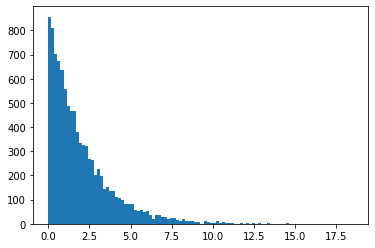

In [28]:
data_dist = (data**2).sum(axis=0)

plt.figure()
plt.hist(data_dist, bins=100)
plt.show()

In [29]:
# Od jakiej wartości będzie mniejsza otrzymana wartość z prawdopodobieństwem 0.15 ? (niejasno napisane?)

p = 0.95

# na podstawie rozkładu prawdopodobieństwa
# (zakładamy, że jesteśmy pewni, że wartości pochodzą z rozkładu normalnego)
a1 = chi2.ppf(p, 2)
print(a1)

# na postawie próbki danych z rozkładu prawdopodobieństwa
# (nie jesteśmy pewni jaki to rozkład prawdopodobieństwa, ale mamy próbkę danych otrzymanych z niego)
a2 = np.sort(data_dist)[int(p * len(data_dist))]
print(a2)

5.991464547107979
5.862233512046504


## B.4. Data Whitening

In [30]:
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
# rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])

data = rv.rvs(size=10000).T

(2, 10000)
[ 0.52350336 -0.1919598 ] [1.41321596 0.7044419 ]
[[1.99737908 0.30352692]
 [0.30352692 0.49628801]]


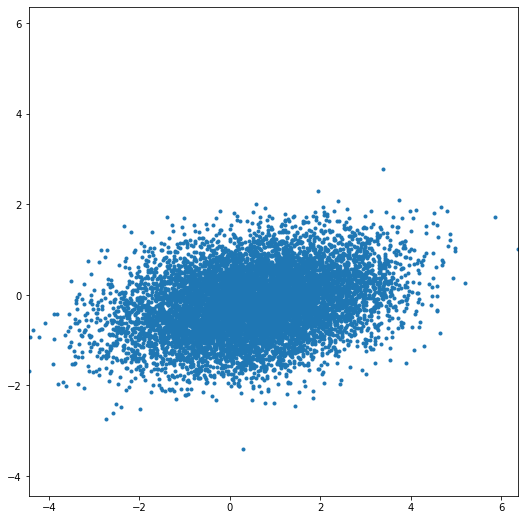

In [31]:
print(data.shape)
print(data.mean(axis=1), data.std(axis=1))
print(np.cov(data))

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.plot(data[0, :], data[1, :], '.')
plt.xlim([data.min(), data.max()])
plt.ylim([data.min(), data.max()])
plt.show()

In [32]:
data_mean = data.mean(axis=1)
data_std = data.std(axis=1)

data_standardized = (data - data_mean[np.newaxis].T) / data_std[np.newaxis].T

(2, 10000)
[-8.59090576e-16 -5.41514056e-16] [1. 1.]
[[1.00010001 0.30489023]
 [0.30489023 1.00010001]]


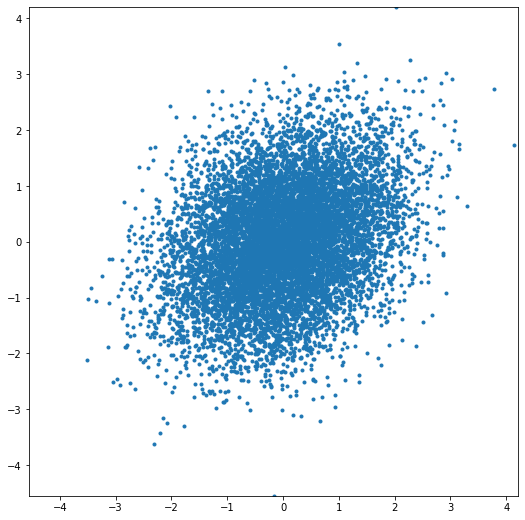

In [33]:
print(data_standardized.shape)
print(data_standardized.mean(axis=1), data_standardized.std(axis=1))
print(np.cov(data_standardized))

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.plot(data_standardized[0, :], data_standardized[1, :], '.')
plt.xlim([data_standardized.min(), data_standardized.max()])
plt.ylim([data_standardized.min(), data_standardized.max()])
plt.show()

In [34]:
C = np.cov(data_standardized)
C

array([[1.00010001, 0.30489023],
       [0.30489023, 1.00010001]])

In [35]:
d, V = eig(C)

In [36]:
d

array([0.69520978, 1.30499024])

In [37]:
V

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

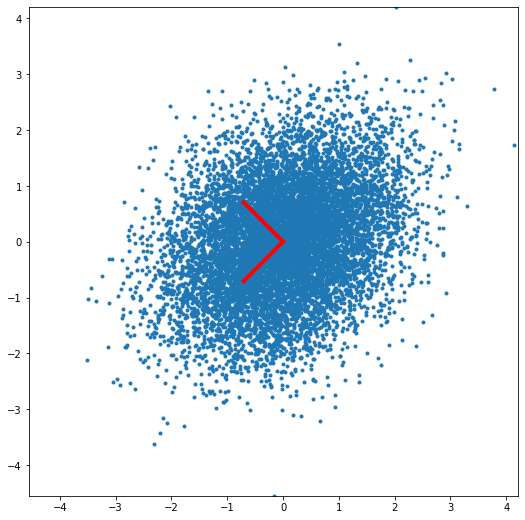

In [38]:
# print(data_standardized.shape)
# print(data_standardized.mean(axis=1), data_standardized.std(axis=1))
# print(np.cov(data_standardized))

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.plot(data_standardized[0, :], data_standardized[1, :], '.')
plt.plot([0, V[0, 0]], [0, V[1, 0]], 'r-', lw=4)
plt.plot([0, V[0, 1]], [0, V[1, 1]], 'r-', lw=4)
# plt.plot([0, 3*V[0, 0]], [0, 3*V[1, 0]], 'r-', lw=4)
# plt.plot([0, 3*V[0, 1]], [0, 3*V[1, 1]], 'r-', lw=4)
# plt.plot([0, np.sqrt(d[0])*V[0, 0]], [0, np.sqrt(d[0])*V[1, 0]], 'r-', lw=4)
# plt.plot([0, np.sqrt(d[1])*V[0, 1]], [0, np.sqrt(d[1])*V[1, 1]], 'r-', lw=4)
plt.xlim([data_standardized.min(), data_standardized.max()])
plt.ylim([data_standardized.min(), data_standardized.max()])
plt.show()

In [39]:
# data_whitened = V.T.dot(data_standardized)
data_whitened = V.T.dot(data_standardized) / np.sqrt(d)[np.newaxis].T

(2, 10000)
[2.85638180e-16 8.77520279e-16] [0.99995 0.99995]
[[1.00000000e+00 1.79429984e-17]
 [1.79429984e-17 1.00000000e+00]]


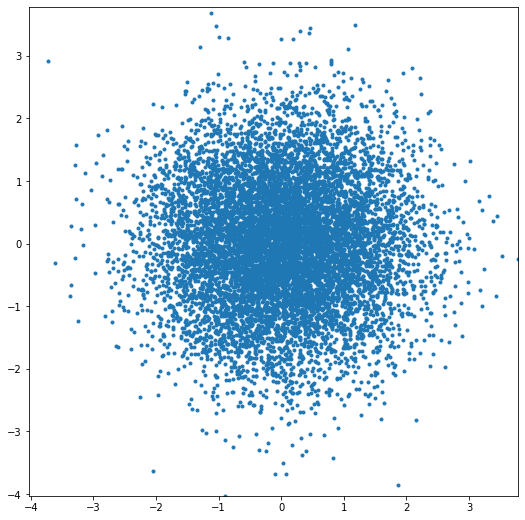

In [40]:
print(data_whitened.shape)
print(data_whitened.mean(axis=1), data_whitened.std(axis=1))
print(np.cov(data_whitened))

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.plot(data_whitened[0, :], data_whitened[1, :], '.')
plt.xlim([data_whitened.min(), data_whitened.max()])
plt.ylim([data_whitened.min(), data_whitened.max()])
plt.show()

In [41]:
data_unwhitened = V.dot(data_whitened * np.sqrt(d)[np.newaxis].T)

(2, 10000)
[-8.74678108e-16 -5.39301936e-16] [1. 1.]
[[1.00010001 0.30489023]
 [0.30489023 1.00010001]]


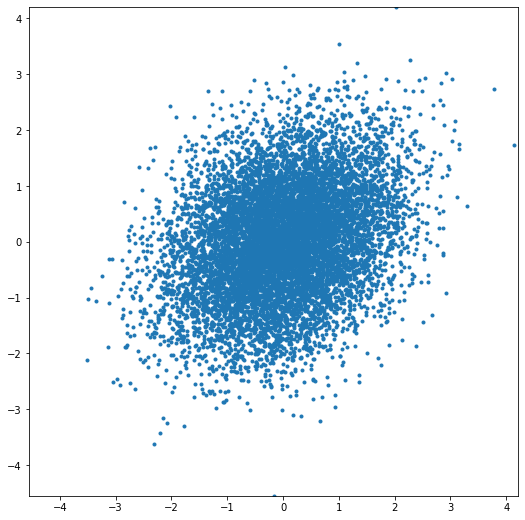

In [42]:
print(data_unwhitened.shape)
print(data_unwhitened.mean(axis=1), data_unwhitened.std(axis=1))
print(np.cov(data_unwhitened))

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.plot(data_unwhitened[0, :], data_unwhitened[1, :], '.')
plt.xlim([data_unwhitened.min(), data_unwhitened.max()])
plt.ylim([data_unwhitened.min(), data_unwhitened.max()])
plt.show()

In [43]:
np.abs(data_standardized - data_unwhitened).max()

1.3322676295501878e-15